In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [224]:
df = pd.read_csv("telco_data.csv")

In [225]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [226]:
df.shape

(7043, 21)

#### Columns info

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [228]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [229]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


#### Finding null values

In [230]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Finding duplicates

In [231]:
df.duplicated().sum()

0

In [232]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Droping irrevelant  customer id column

In [233]:
df = df.drop(labels=['customerID'],axis=1)

#### Finding unique value in the column

In [234]:
for col in df:
    print(col)
    print(df[col].unique())
    print('*'*30)

gender
['Female' 'Male']
******************************
SeniorCitizen
[0 1]
******************************
Partner
['Yes' 'No']
******************************
Dependents
['No' 'Yes']
******************************
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
******************************
PhoneService
['No' 'Yes']
******************************
MultipleLines
['No phone service' 'No' 'Yes']
******************************
InternetService
['DSL' 'Fiber optic' 'No']
******************************
OnlineSecurity
['No' 'Yes' 'No internet service']
******************************
OnlineBackup
['Yes' 'No' 'No internet service']
******************************
DeviceProtection
['No' 'Yes' 'No internet service']
******************************
TechSupport
['No' 'Yes' 'No internet service']
**************************

#### Converting TotalCharges into float

In [235]:
df.query('TotalCharges == " "')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


##### converting blank to nan and then fill nan with median

In [236]:
median = np.median(df.query('TotalCharges != " "')['TotalCharges'].astype('float'))

In [237]:
df['TotalCharges']=df['TotalCharges'].replace(" ",median)
df['TotalCharges']=df['TotalCharges'].astype('float')

####  converting senior citizen into category for better visualization

In [238]:
df1 = df.copy()
df1 = df1['SeniorCitizen'].replace({1:'Yes',0:'No'},inplace=True)

## Data Visualization

In [239]:
df1 = df.copy()

##### segregate numerical and categorical columns



In [240]:
numerical_columns=df1.columns[df1.dtypes!='object']
categorical_columns=df1.columns[df1.dtypes=='object']
print(numerical_columns)
print(categorical_columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [241]:
for cat in categorical_columns:
    print("*"*30)
    print(df1[cat].value_counts())
    print("*"*30)

******************************
gender
Male      3555
Female    3488
Name: count, dtype: int64
******************************
******************************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
******************************
******************************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
******************************
******************************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
******************************
******************************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
******************************
******************************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
******************************
******************************
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
**********

##### Numerical category visualization

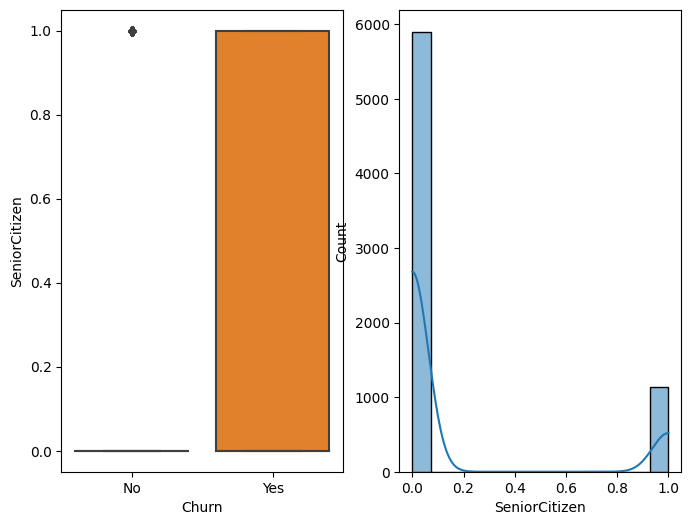

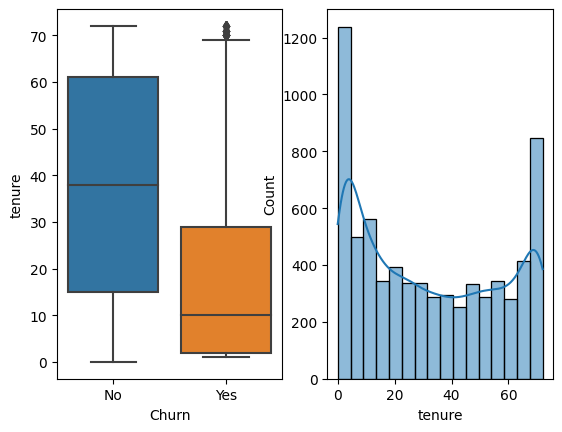

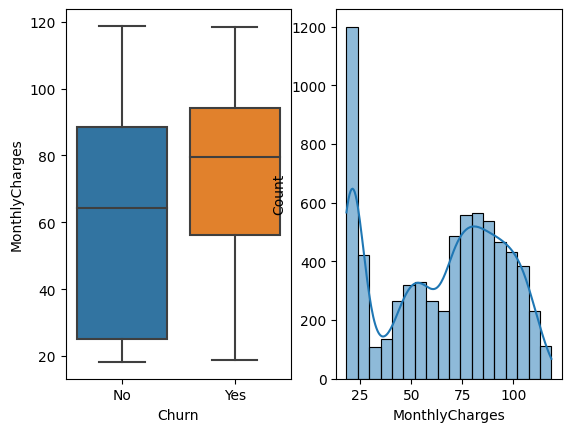

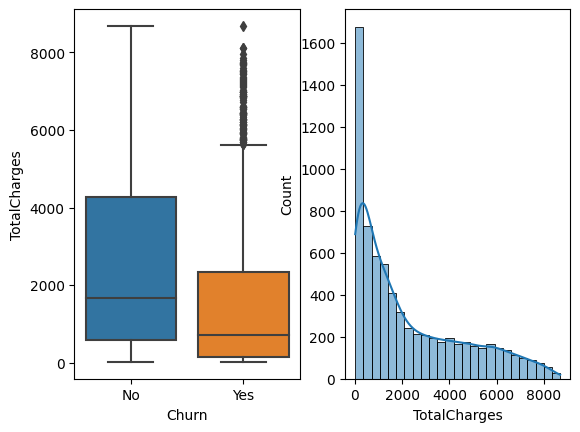

In [242]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    plt.subplot(1,2,1)
    sns.boxplot(y=df1[i],x=df1.Churn)
    plt.subplot(1,2,2)
    sns.histplot(data=df1,x=df1[i],kde=True)
    print('\n')
    plt.show()

##### Conclusion
* People with less tenure period are churning.
* High churn can be seen with high MonthlyCharges.
* People with low total charges are churning more.

In [243]:
def plot_cat(feature):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    
    # As there are few columns with 2 uniques values, few with 3 unique values 
    # and one column with 4 unique values so to plot pie chart i have used if statement
    if df[feature].nunique() == 2 :
        a=df[feature].value_counts()[0]
        b=df[feature].value_counts()[1]
        c=df[feature].value_counts().index
        ax=plt.pie(x=[a,b],labels=c,autopct='%1.2f%%')
    elif df[feature].nunique() == 3 :
        a=df[feature].value_counts()[0]
        b=df[feature].value_counts()[1]
        c=df[feature].value_counts()[2]
        d=df[feature].value_counts().index
        ax=plt.pie(x=[a,b,c],labels=d,autopct='%1.2f%%')
    else:
        a=df[feature].value_counts()[0]
        b=df[feature].value_counts()[1]
        c=df[feature].value_counts()[2]
        d=df[feature].value_counts()[3]
        e=df[feature].value_counts().index
        ax=plt.pie(x=[a,b,c,d],labels=e,autopct='%1.2f%%')
        
        
    
    plt.subplot(1,2,2)
    ax=sns.countplot(x=df[feature],hue=df.Churn)
    plt.xticks(rotation=90)

##### Caategorical category visualization

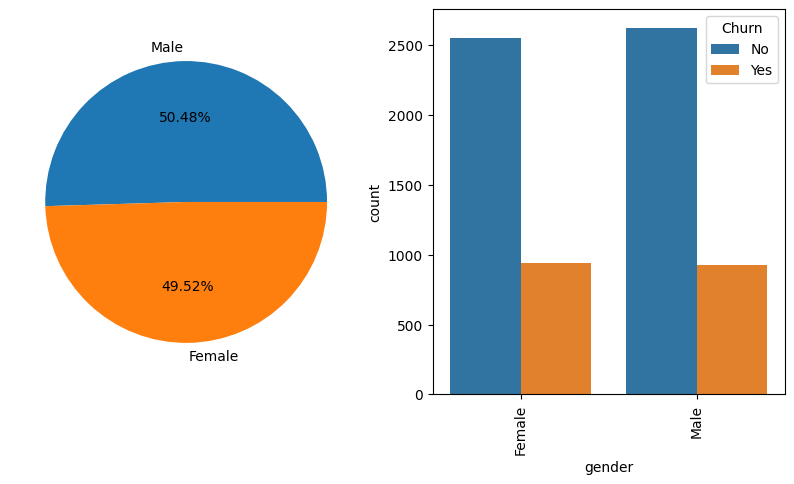

In [244]:
plot_cat("gender")

### Insight
- Both are equally churning

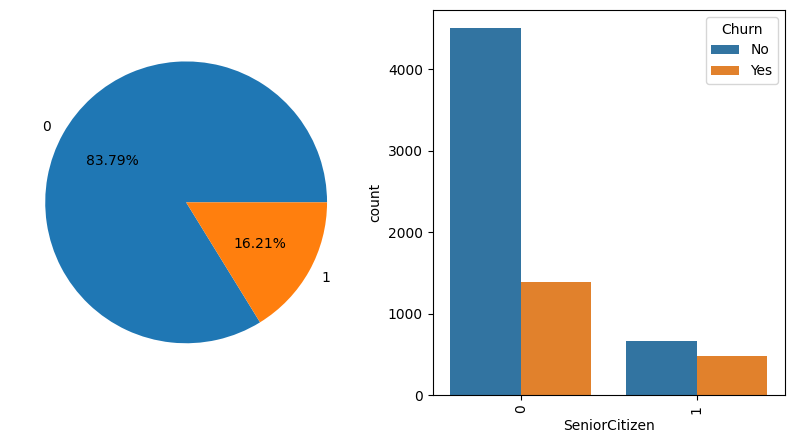

In [245]:
plot_cat("SeniorCitizen")

### Insight
In Distribution Persons who are senior citizen
- Senior citizen are churning less as compare to others

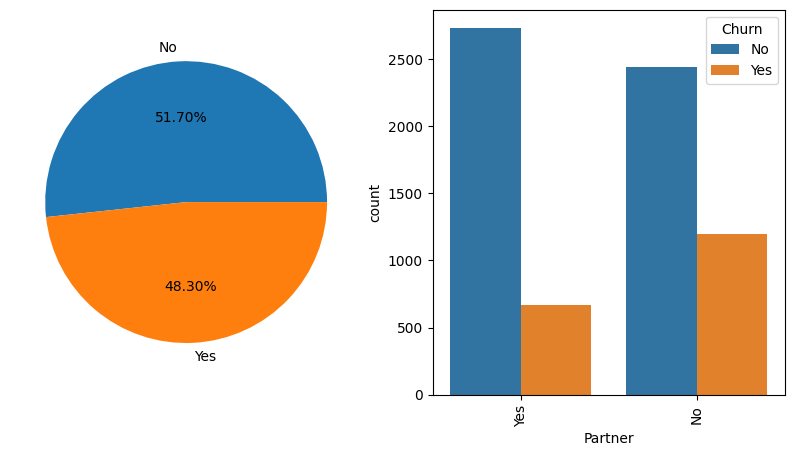

In [246]:
plot_cat("Partner")

### Insight
In Distribution Persons who have partners
- People who dont have partner are churning more as compare to those who have partner

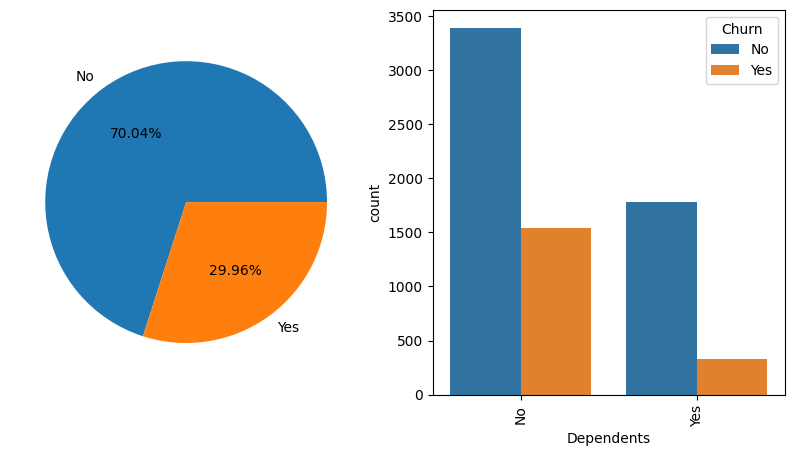

In [247]:
plot_cat("Dependents")

### Insight
In Distribution Preson who are dependents 
- People who are not dependent are churning more than other

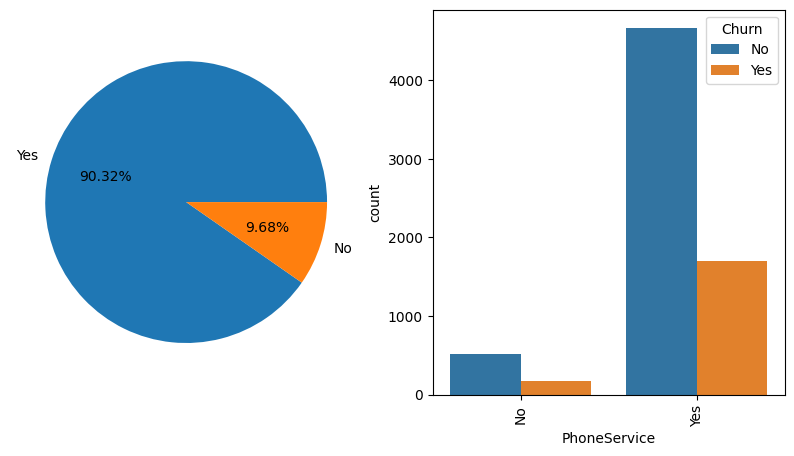

In [248]:
plot_cat("PhoneService")

### Insight
In Distribution Person who does not use phone service
- People who are not using phoneservice are churning more than  other


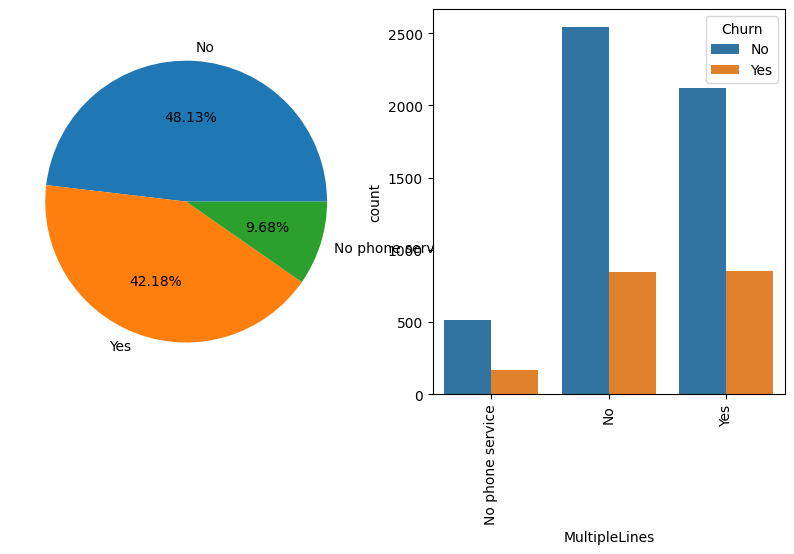

In [249]:
plot_cat("MultipleLines")

### Insight
- No phone service is churning less

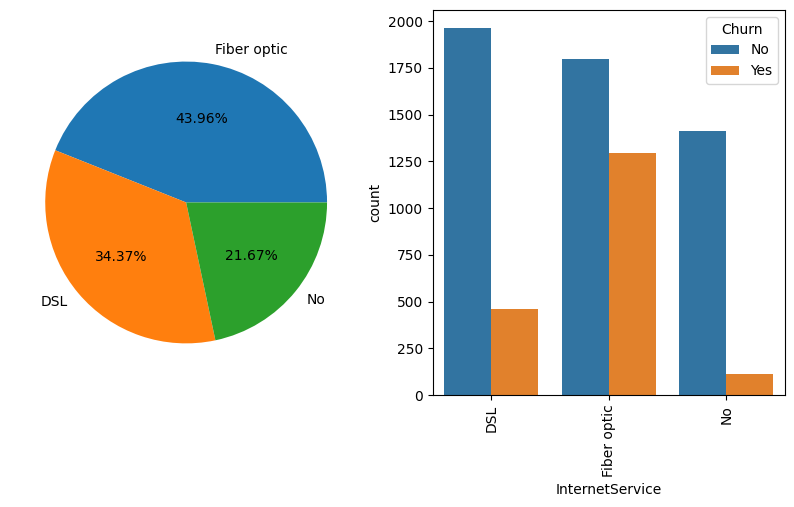

In [250]:
plot_cat("InternetService")

### Insight
- Fiber optic is churning more than other two

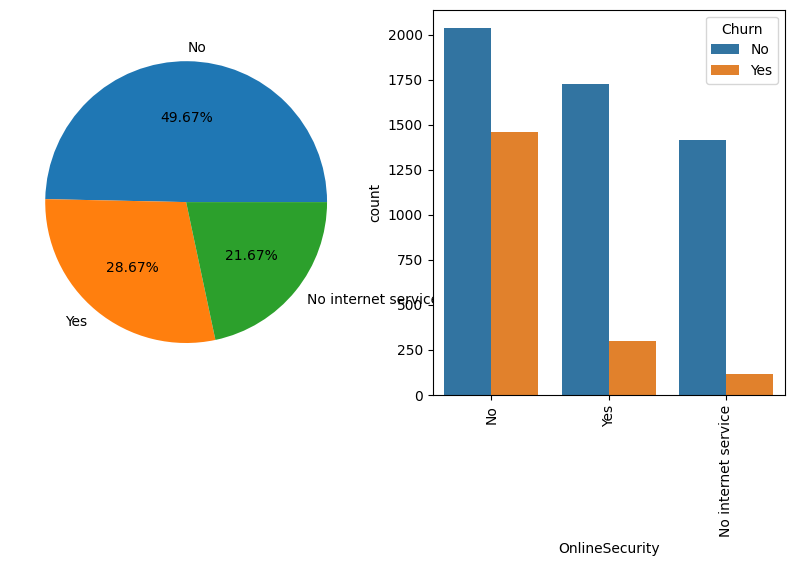

In [251]:
plot_cat("OnlineSecurity")

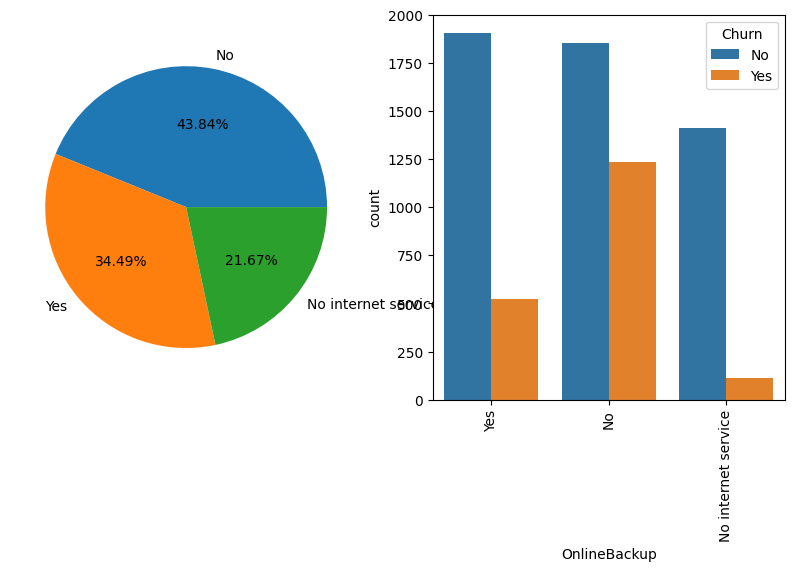

In [252]:
plot_cat("OnlineBackup")

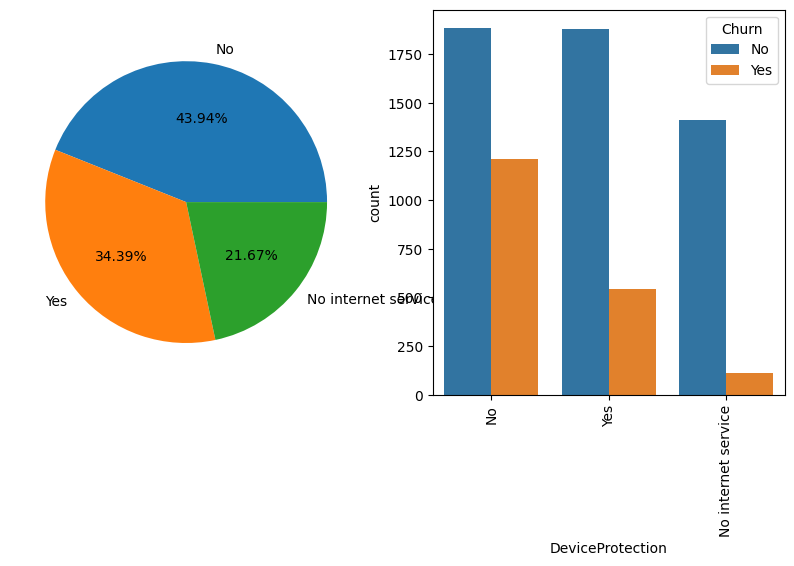

In [253]:
plot_cat("DeviceProtection")

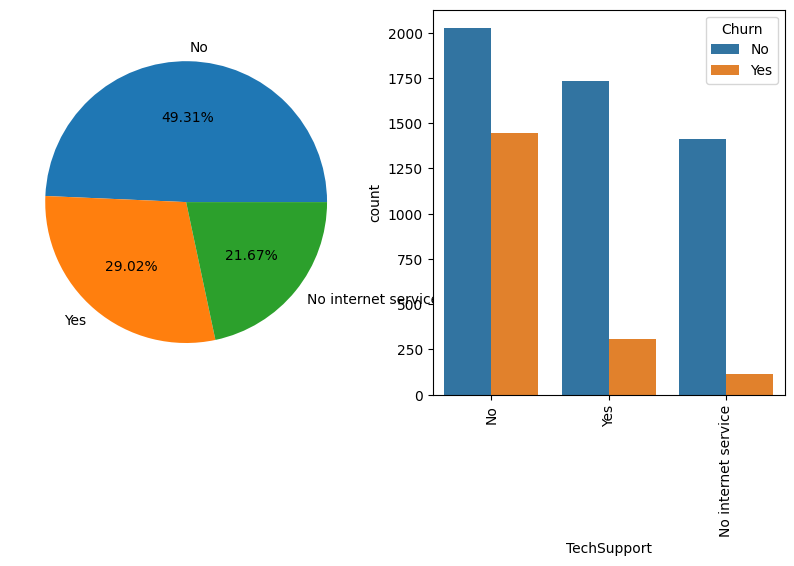

In [254]:
plot_cat("TechSupport")

### Insight
- People who are not getting tech support are chuning more whith respect to others

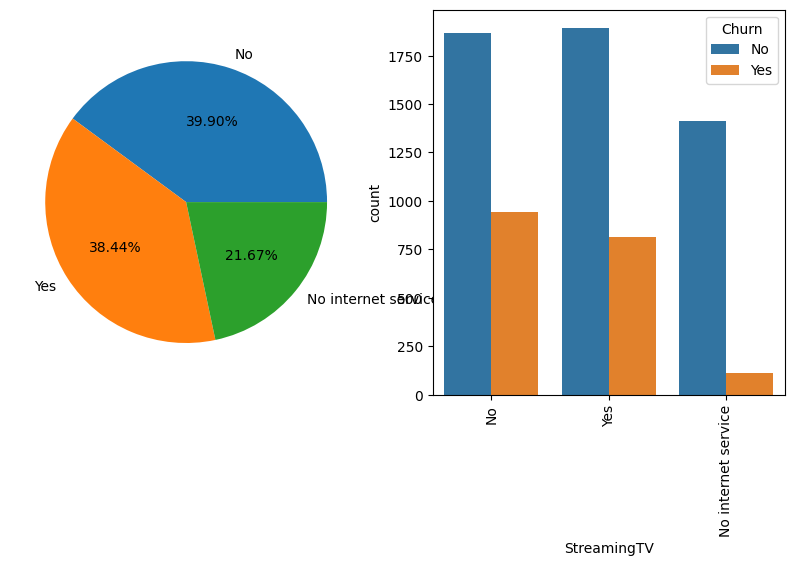

In [255]:
plot_cat("StreamingTV")

### Insights
- People who does not have streamtv are churning more with respect to other two factor

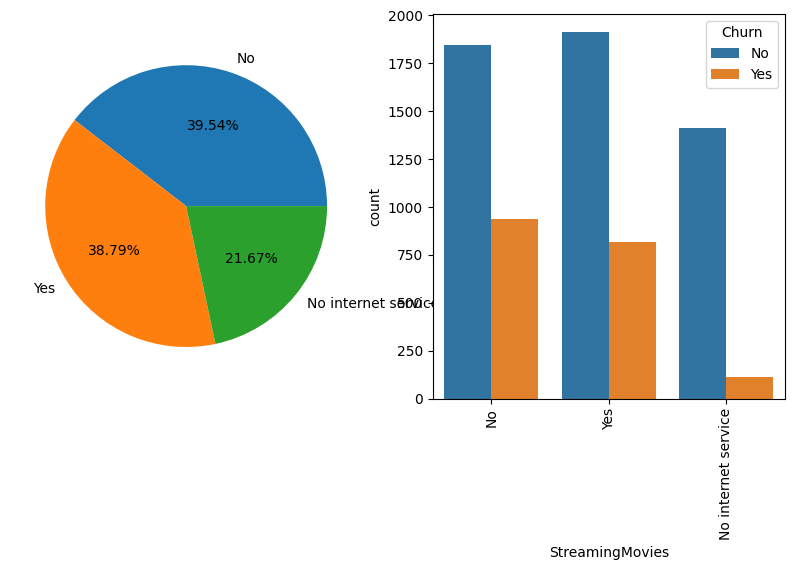

In [256]:
plot_cat("StreamingMovies")

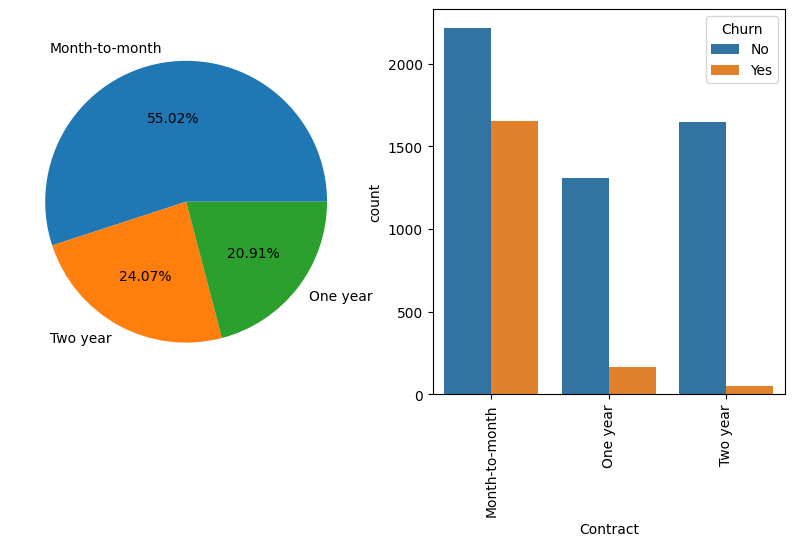

In [257]:
plot_cat("Contract")

### Insight
- People who have month to month contract are churning more than others

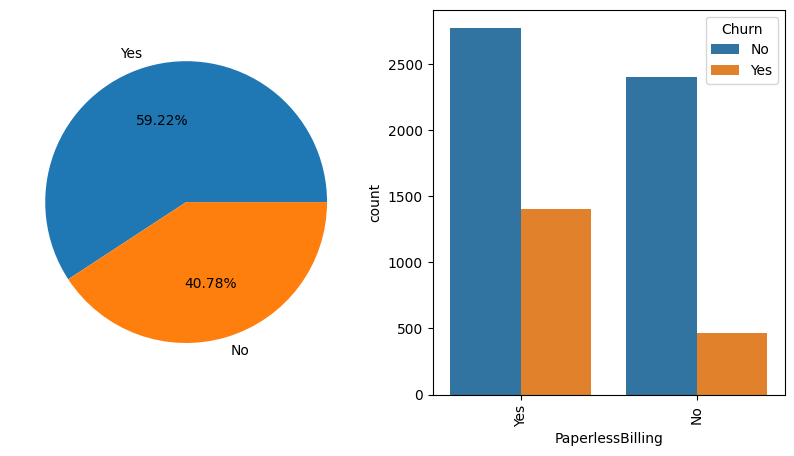

In [258]:
plot_cat("PaperlessBilling")

### Insight
- People who has paperless billing are churning more than other

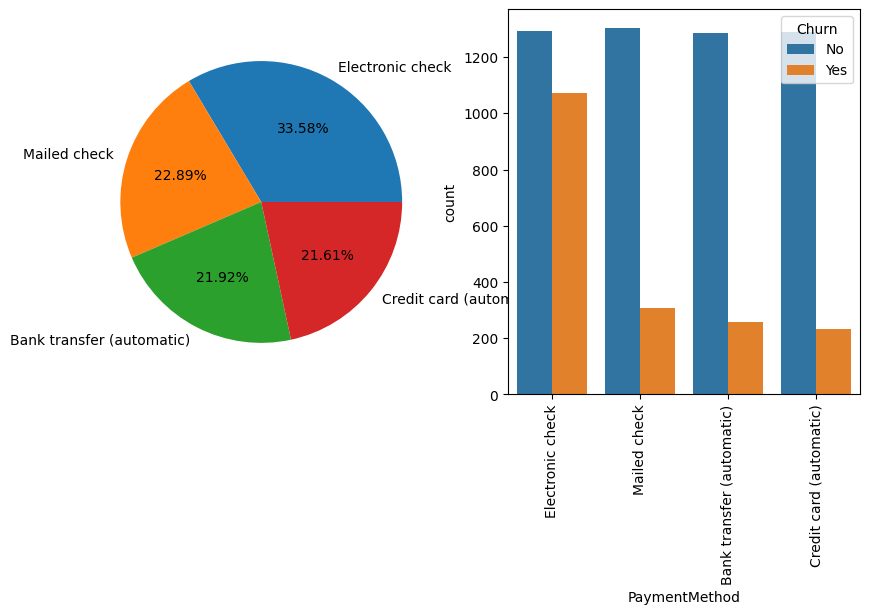

In [259]:
plot_cat("PaymentMethod")

### Insight
- People who has electronic check payment method churn more than others

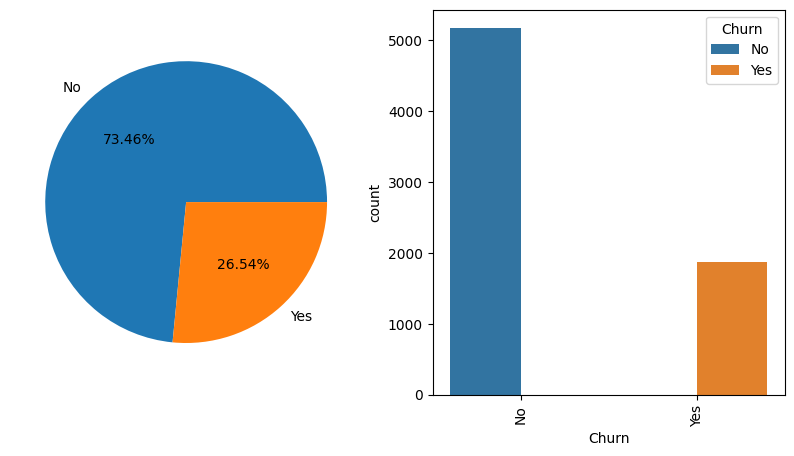

In [260]:
plot_cat("Churn")

### Conclusion
* Sample of population who are churning is very less as compare to sample of population who are not churning
* HIGH Churn seen in case of Month to month contracts, No online security,No Tech support, First year of subscription and Fibre Optics Internet.
* LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years.
* Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, Higher Monthly Charge, Lower tenure and Lower Total Charge are linked to High Churn.

#### Saving clean data which will used for model training

In [274]:
df['Churn'] = df['Churn'].replace({'No':0,'Yes':1})

In [275]:
df['Churn'].unique()

array([0, 1], dtype=int64)

In [276]:
df.to_csv("clean_data.csv",index=False)

In [271]:
df1 = df.copy()

In [272]:
df1['Churn'] = df1['Churn'].replace({'No':0,'Yes':1})

In [273]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
